# WeatherPy

In [94]:
# Dependencies, Libraries & more
import pandas as pd
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy # Why?

In [95]:
# Create city list
cities = []
# Create coordinates list
coordinates = []
# Generate 800 random latitudes and 800 random longitudes
# Longitud +/- 180 from the Equator
lon = np.random.uniform(low=-180.0000, high=180.0000, size=1400)
# Latitud +/- 90 from Greenwich Meridian
lat = np.random.uniform(low=-90.0000, high=90.0000, size=1400)
# Join the two random lists
coordinates = zip(lat, lon)
# Find nearest city for longitude latitude combos and if it is first timer include in the list
for coord in coordinates:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    if city not in cities:
        cities.append(city.title())

# API Calls for Temperature, Humidity, Cloudiness & Windspeed

In [96]:
# Import API key
from llaves import api_key

# Output File (CSV)
output_data = "weather_df.csv"

# Weather config
weathurl = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# # define url

# Build partial query URL
q_url_1 = f"{weathurl}appid={api_key}&units={units}&q="
# query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# Lists
city_selection = []
countries = []
hi_temps = []
humidities = []
clouds = []
winds_sp = []
dates = []
lats = []
lons = []
i = 1

# Create a loop to feed the city list
for city in cities:
    q_url_2 = q_url_1 + city
    response = requests.get(q_url_2).json()
    
    try:
        country = response['sys']['country']
        hi_temp = response['main']['temp_max']
        humidity = response['main']['humidity']
        cloud = response['clouds']['all']
        wind_sp = response['wind']['speed']
        date = response['dt']
        lat = response['coord']['lat']
        lon = response['coord']['lon']

    except:
        country = np.nan
        hi_temp = np.nan
        humidity = np.nan
        cloud = np.nan
        wind_sp = np.nan
        date = np.nan
        lat = np.nan
        lon = np.nan

    countries.append(country)
    dates.append(date)
    lats.append(lat)                                          
    lons.append(lon)
    hi_temps.append(hi_temp)
    humidities.append(humidity)
    clouds.append(cloud)
    winds_sp.append(wind_sp)
        
    # Print the data being processed
    # print (f"{i}: {city} --> Country: {country} Coordinates: {lat},{lon} Max Temp: {hi_temp}, Humidity: {humidity}, Cloudiness: {cloud}, Wind Speed: {wind_sp}")
    i+=1

# What's the weather like as we approach the equator?

In [97]:
# Create Dictionary and then a DataFrame
dicto = {
    "City": cities,
    "Cloudiness": clouds,
    "Country": countries,
    "Date": dates,
    "Humidity": humidities,
    "Lat": lats,
    "Lon": lons,
    "Hi Temp": hi_temps,
    "Wind Speed": winds_sp
}
weather_df = pd.DataFrame(dicto)
weather_df.to_csv(output_data)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Hi Temp,Wind Speed
0,Sisophon,91.0,KH,1.619743e+09,78.0,13.5859,102.9737,26.92,2.67
1,San Cristobal,75.0,VE,1.619743e+09,100.0,7.7669,-72.2250,24.00,1.54
2,Cam Ranh,20.0,VN,1.619743e+09,69.0,11.9214,109.1591,28.00,2.57
3,Taolanaro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Yellowknife,75.0,CA,1.619743e+09,59.0,62.4560,-114.3525,-1.67,6.17


# The first requirement is to create a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

# Create a series of scatter plots to showcase required relationships

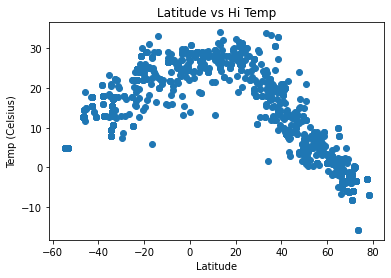

In [98]:
# Temperature (F) vs. Latitude
plt.scatter(weather_df["Lat"],weather_df["Hi Temp"])
plt.title("Latitude vs Hi Temp")
plt.xlabel("Latitude")
plt.ylabel("Temp (Celsius)")
plt.savefig("Lat_Temp.png")
plt.show()

The graph shows there is a negative correlation between the distance of a city from the Equator.  The highes temperature of the day increases as the distance from the Equator decreases.

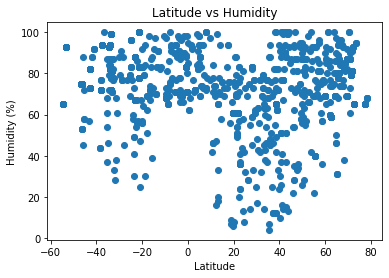

In [99]:
# Humidity (%) vs. Latitude
plt.scatter(weather_df["Lat"],weather_df["Humidity"])
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Lat_Humidity.png")
plt.show()

There is no observable correlation between latitude and humidity.  Humidity may have higher correlations with other variables as altitude and distance from massive water bodies.

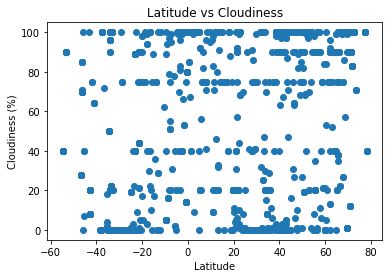

In [100]:
# Cloudiness (%) vs. Latitude
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"])
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Lat_Cloudiness.png")
plt.show()

There is no apparent correlation between cloud formations and latitude.

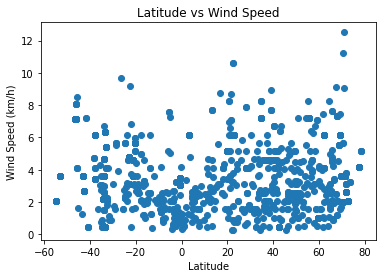

In [101]:
# Wind Speed (mph) vs. Latitude
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"])
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (km/h)")
plt.savefig("Lat_WindSpeed.png")
plt.show()

There is no observable correlation between wind speed and latitude.

# The second requirement is to run linear regression on each relationship. This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

In [ ]:
# Northern Hemisphere - Temperature (F) vs. Latitude
